In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [109]:
file_name='/Users/laura/Downloads/training_dataset-1.csv'
df=pd.read_csv(file_name)
df.head()
file1_name='/Users/laura/Downloads/test_dataset-1.csv'
test=pd.read_csv(file1_name)

In [111]:
dtrain=df.drop(['price'],axis=1)
database=pd.concat([dtrain,test])

In [87]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [88]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,1.761400e+04,17614.000000,17614.000000,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,4.569068e+09,5.408514e+05,3.372431,2.113475,2080.915692,1.513310e+04,1.495856,0.007097,0.233848,3.409844,7.660100,1789.456398,291.459294,1970.917566,80.774384,98078.043204,47.560487,-122.214127,1985.633303,12680.009424
std,2.869570e+09,3.685506e+05,0.935641,0.773550,923.863759,4.194362e+04,0.540092,0.083944,0.765230,0.649949,1.179174,831.418845,443.419741,29.425821,393.288442,53.473239,0.138408,0.140161,685.581487,26713.761385
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122052e+09,3.225000e+05,3.000000,1.500000,1420.000000,5.053250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.607000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572700,-122.230000,1840.000000,7600.000000
75%,7.300200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10057.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [90]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [91]:
df.head()
#print(df.drop(columns = 'id'))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3787000140,20140901T000000,450000,3,2.25,1780,9969,1.0,0,0,...,8,1450,330,1985,0,98034,47.7286,-122.168,1950,7974
1,1934800078,20140930T000000,430000,2,2.25,1040,1516,2.0,0,0,...,8,1040,0,2008,0,98122,47.6037,-122.307,1560,1920
2,7331900290,20140731T000000,230000,4,1.50,1520,8800,1.0,0,0,...,7,1520,0,1960,0,98002,47.3136,-122.208,1370,8800
3,3438500798,20140715T000000,275000,3,1.50,1060,6954,1.0,0,0,...,6,1060,0,1983,0,98106,47.5498,-122.355,1560,6954
4,2697400020,20141031T000000,400000,3,2.00,1350,7216,1.0,0,0,...,7,1350,0,1964,0,98177,47.7616,-122.365,1920,7600


/var/folders/64/0k8tjr2s49189p44lj94bkhr0000gn/T/ipykernel_51073/596692282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

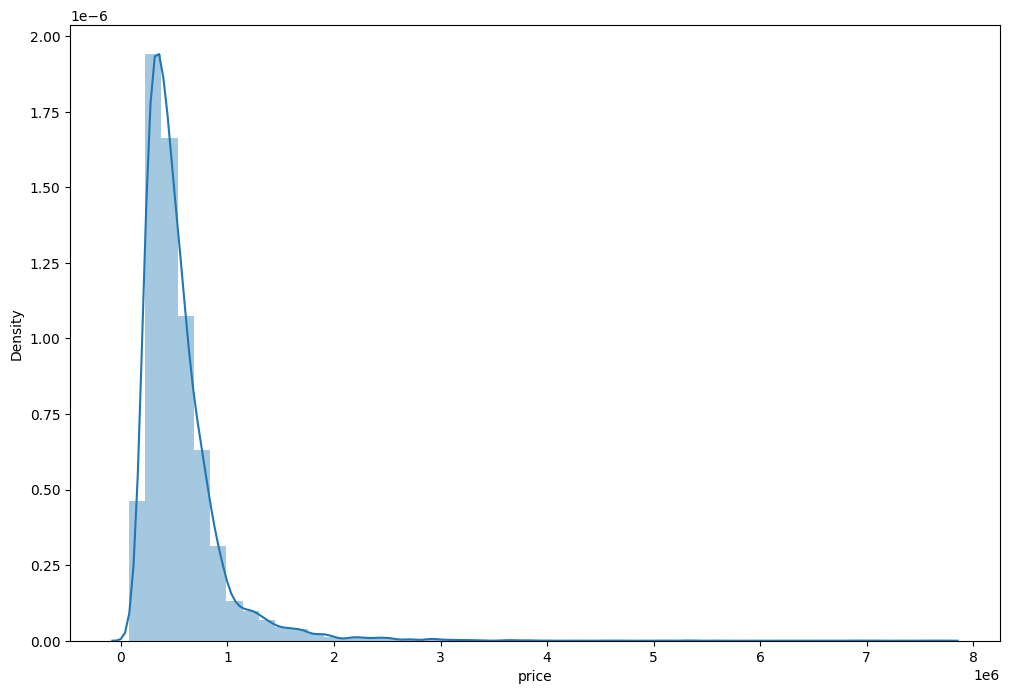

In [92]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

In [118]:
#datacleaning
realobj=['zipcode']
database[realobj]=database[realobj].astype(str)
quant = [f for f in database.columns if database.dtypes[f] != 'object']
quali = [f for f in database.columns if database.dtypes[f] == 'object']
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

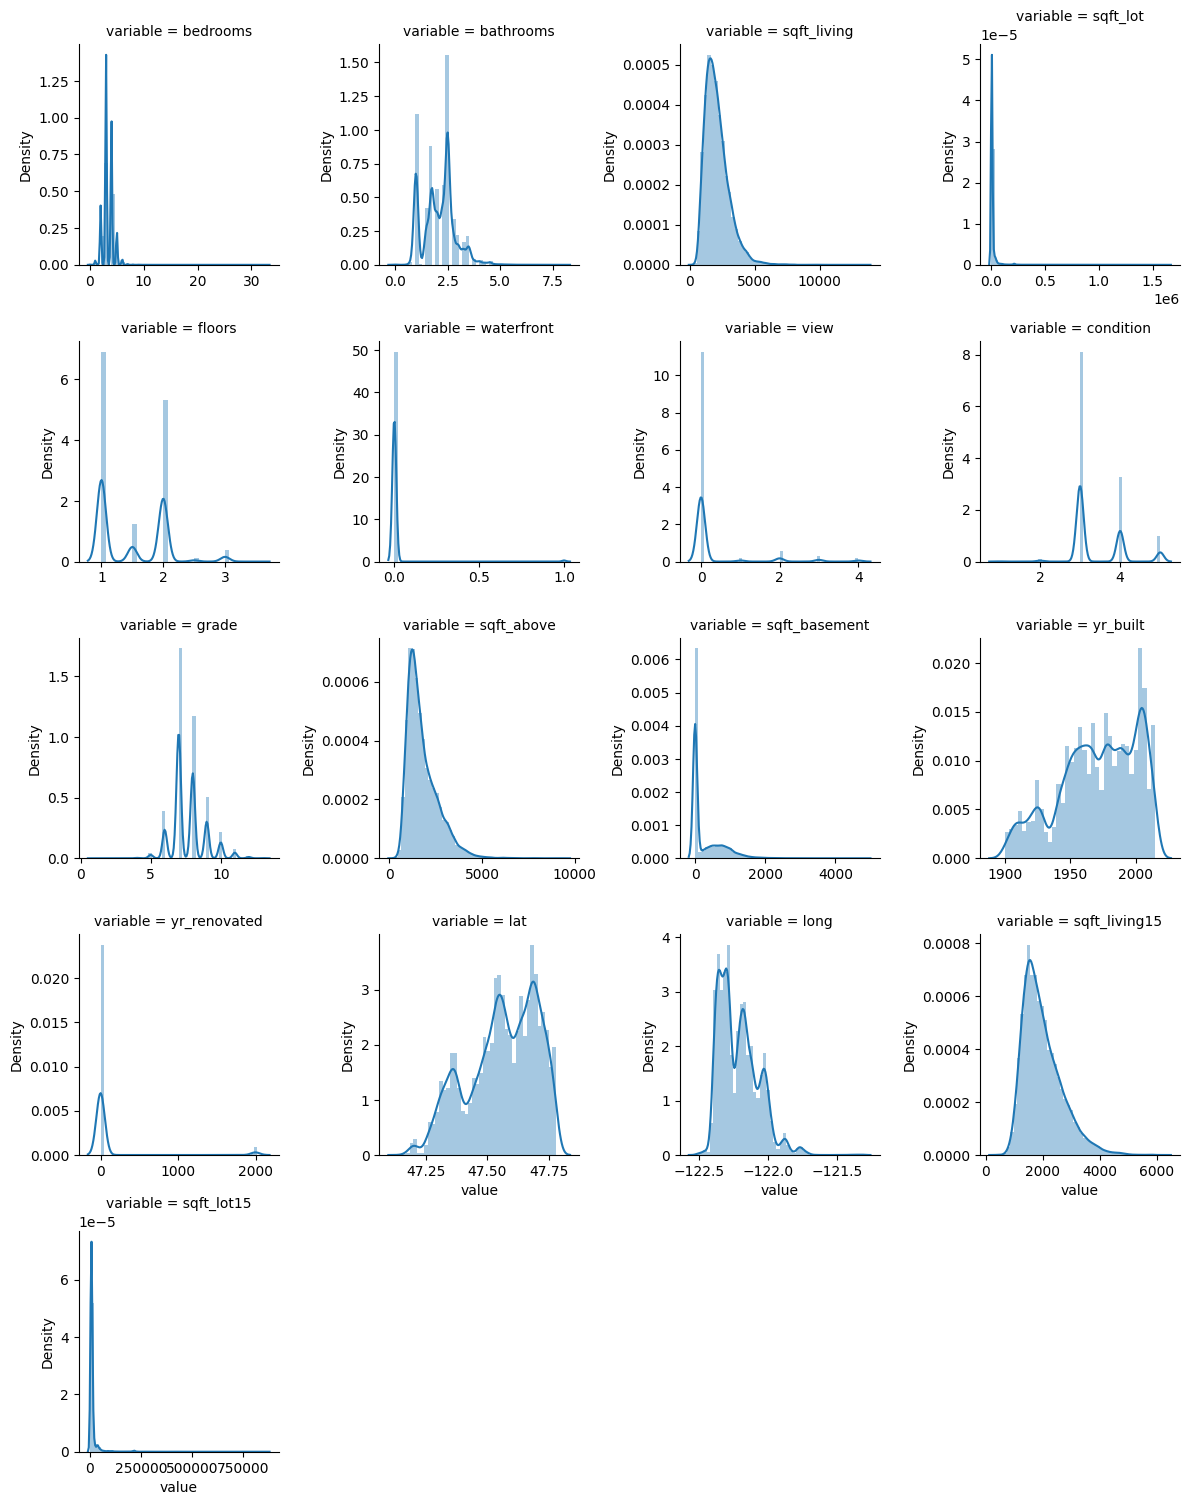

In [119]:
c= [f for f in database.columns if database.dtypes[f] != 'object']
c.remove('id')
f = pd.melt(front, value_vars=c)
g = sns.FacetGrid(f, col="variable", col_wrap=4 , sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [120]:
logtran=['sqft_living','sqft_above','sqft_living15']
front[logtran]=np.log(front[logtran])
front=(front-front.mean())/(front.std())

/var/folders/64/0k8tjr2s49189p44lj94bkhr0000gn/T/ipykernel_51073/2727262369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front[logtran]=np.log(front[logtran])


/var/folders/64/0k8tjr2s49189p44lj94bkhr0000gn/T/ipykernel_51073/1859293213.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.norm)
/var/folders/64/0k8tjr2s49189p44lj94bkhr0000gn/T/ipykernel_51073/1859293213.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=Fal

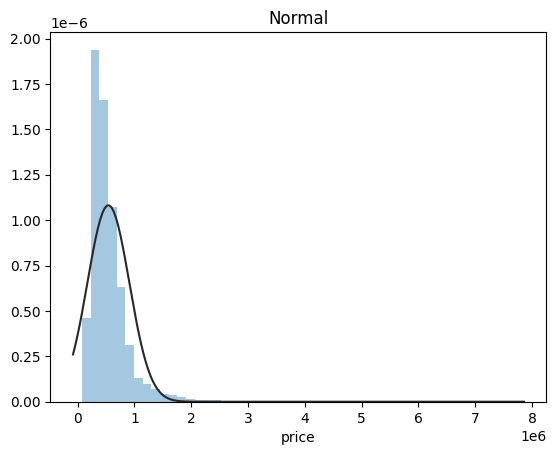

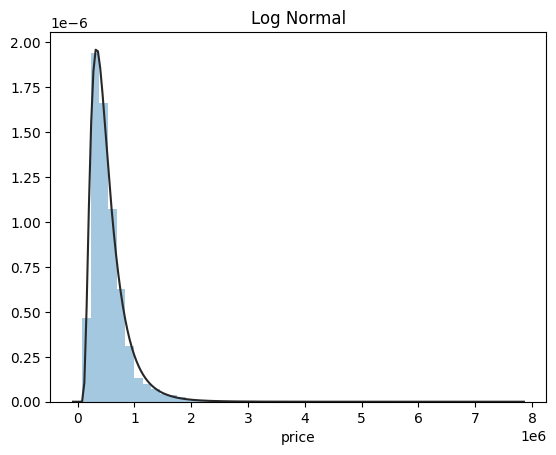

In [126]:
import scipy.stats as stats
y = df['price']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm) 
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
trainresult=np.log(df['price'])

<Axes: >

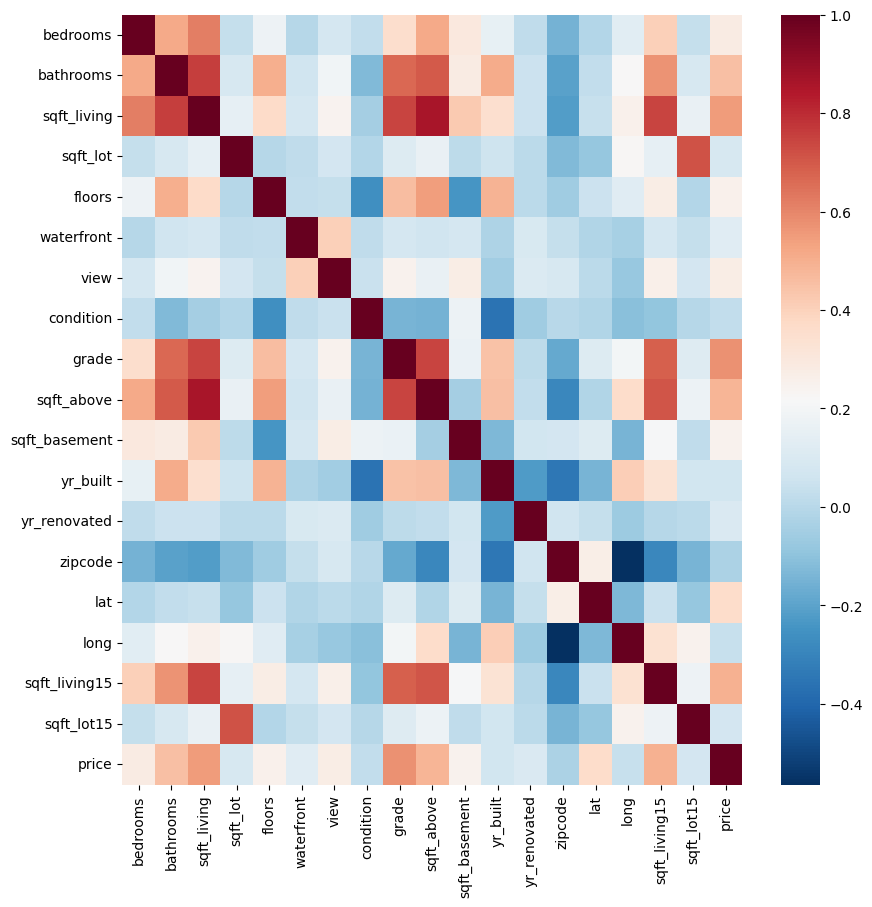

In [141]:
plt.figure(figsize=(10, 10))
#front=front.drop('id',axis=1)
front['price']=np.log(df['price'])
corr = front.corr()
sns.heatmap(corr,cmap="RdBu_r")

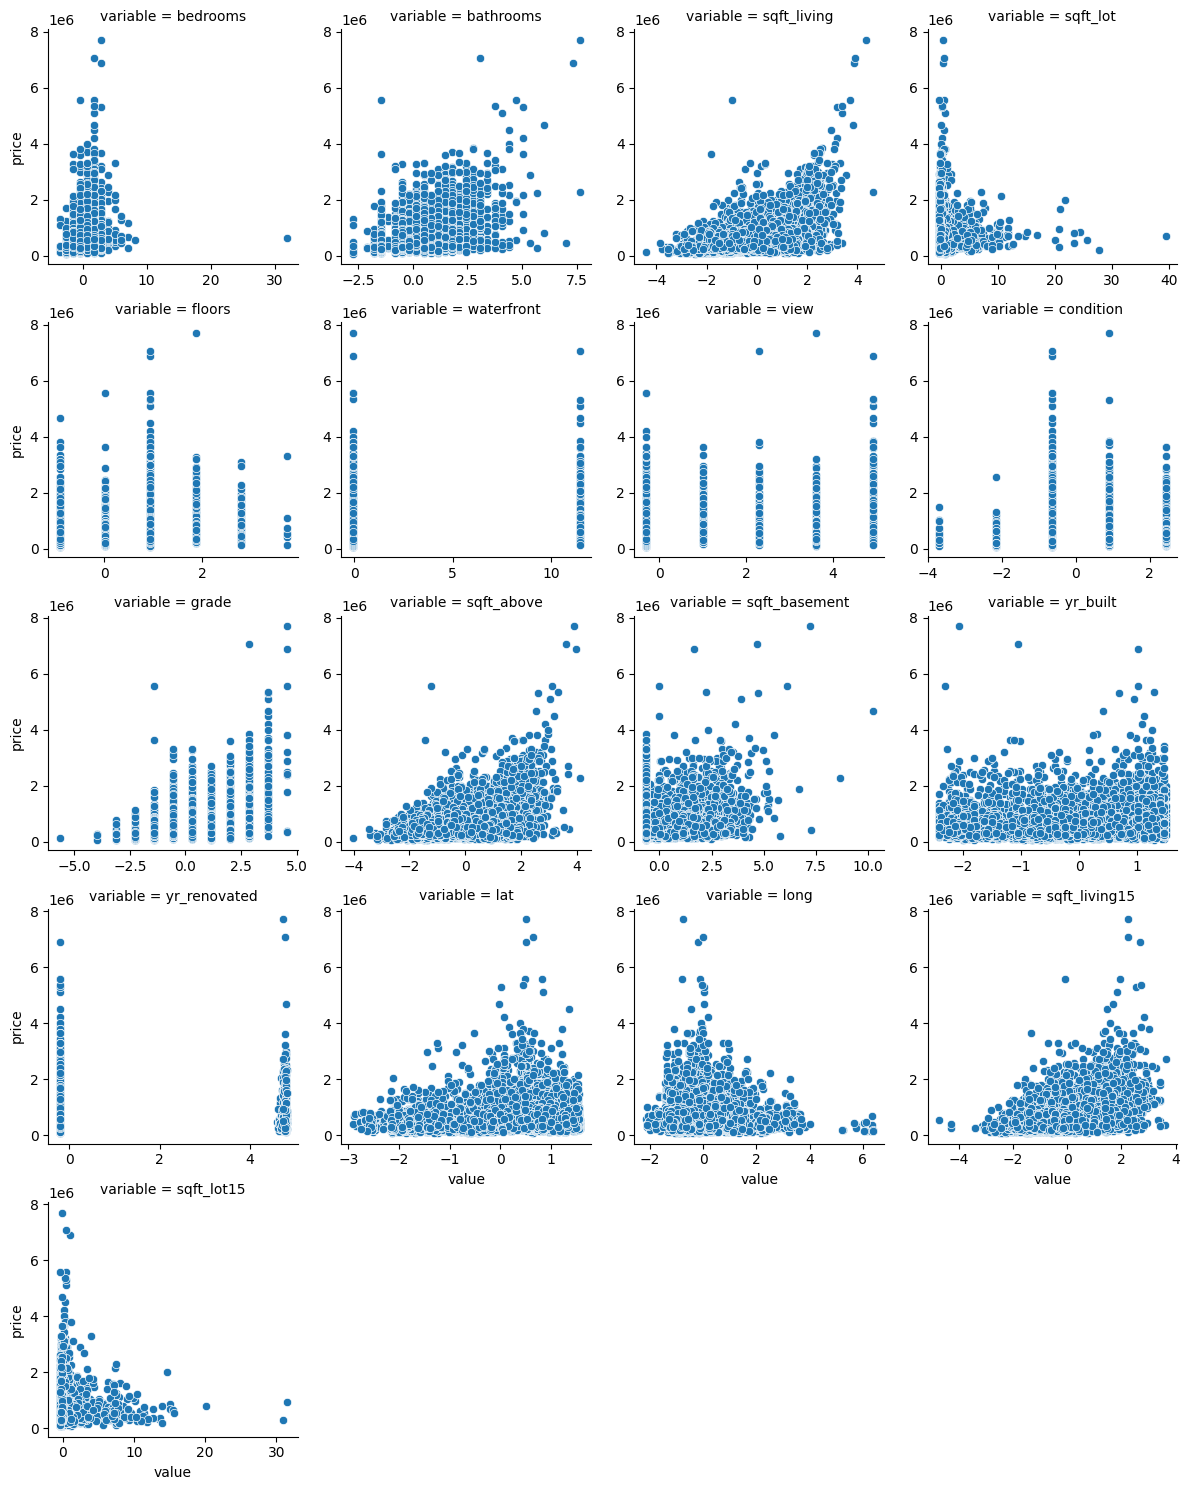

In [151]:
def scatter(x,y,**kwargs):
  sns.scatterplot(x, y)
c= [f for f in database.columns if database.dtypes[f] != 'object']
c.remove('id')
front['price']=df['price']
f = pd.melt(front, id_vars=['price'],value_vars=c)
g = sns.FacetGrid(f, col="variable", col_wrap=4 , sharex=False, sharey=False)
g = g.map(sns.scatterplot, "value",'price')

In [157]:
#feature_selection by Lasso()
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(1e-3,1e-2,1e-4)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=5)
search.fit(databass.iloc[:1458], trainresult)
print(search.best_params_)
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
feature=databass.columns
evaluate=pd.DataFrame({'feature':feature,'importance':importance})
drop=evaluate[evaluate['importance']==0]
databass=databass.drop(drop['feature'],axis=1)

NameError: name 'databass' is not defined

In [93]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,8673
2.0,6735
1.5,1568
3.0,504
2.5,128
3.5,6


Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

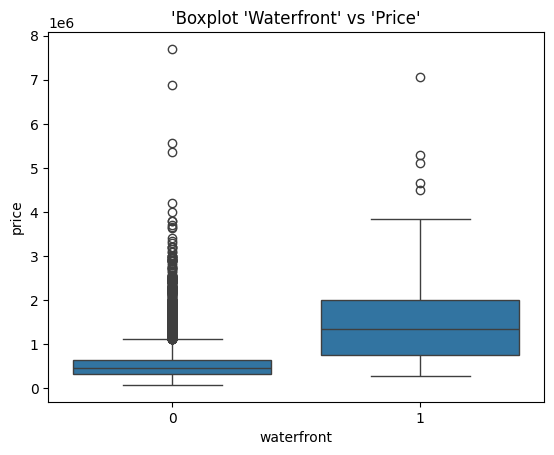

In [94]:
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("'Boxplot 'Waterfront' vs 'Price'")

We can see that it is positively correlated.


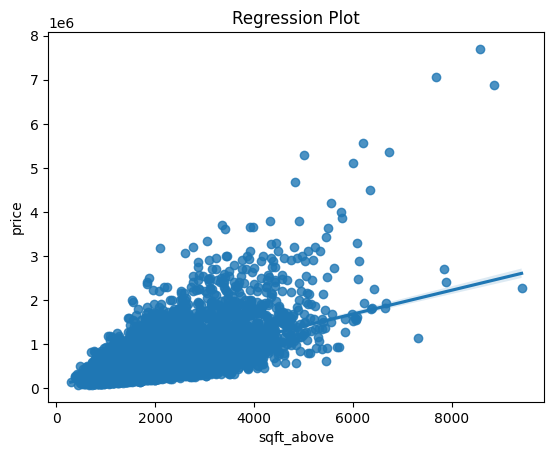

In [95]:
sns.regplot(x = df['sqft_above'], y = df['price'])
plt.title("Regression Plot")
print("We can see that it is positively correlated.")

In [96]:
df.drop(["date"], axis = 1, inplace = True)
df.corr()['price'].sort_values()

zipcode         -0.050456
id              -0.019648
long             0.019278
condition        0.030117
yr_built         0.054371
sqft_lot15       0.083042
sqft_lot         0.090260
yr_renovated     0.138400
waterfront       0.240935
floors           0.259626
lat              0.303832
bedrooms         0.308877
sqft_basement    0.326490
view             0.386241
bathrooms        0.530525
sqft_living15    0.581747
sqft_above       0.610689
grade            0.670447
sqft_living      0.706284
price            1.000000
Name: price, dtype: float64

In [98]:
#caculate the R^2
from sklearn.linear_model import LinearRegression
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00037163480102697655

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 2643
number of training samples: 14971


In [103]:
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score value for the training data is : " + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_pr, y_test)))


The R^2 Score value for the training data is : 0.7404748182510645
The R^2 Score value for the testing data is : 0.7285456320513387
